# Example - Gasification of PMMA 

The cone calorimeter is one of the experimental  set-ups used in fire safety science. A picture of a cone calorimeter can be seen in figure {numref}`fig-pyrolysis-Cone`. A sample is placed under a cone shaped heater. The heater will induce a certain heat flux to the sample, causing the sample to pyrolyse or to burn. During the experiment the mass loss of the sample is measured. Additionally a gasanalyser is used to measure the CO, CO$_2$ amd O$_2$ concentrations released/consumed by the sample. This allows for the determination of the heat release rate of the sample by the Janssens method. Usually the sample is placed in a holder with frame. The space between the bottom of the holder and the sample is usually filled with isolation, although experiments with other filling materials are also possible. 

:::{figure-md} fig-pyrolysis-Cone
<img src="figs/Cone.PNG" width="30%">

Cone calorimeter
:::

The goal of this exercise is to simulate a gasification experiment done by the Aalto university. The data can be found in the MaCFP database: https://github.com/MaCFP/matl-db/tree/master/Non-charring/PMMA/Aalto. TGA data will be used to determine the parameters needed for the gasification experiment. 

## Task 1 

For simulating the gasification experiment, the following fds file will be used as a starting point: {download}`Gasification.fds`, more information on this set-up can be found in the fds userguide part 11.5. Instead of describing the reaction parameters by A and E, we will use the parameter REFERENCE_TEMPERATURE. This is the temperature at which the main reaction peak is located, as is indicated in figure {numref}`fig-fds-parameter-REFERENCE_TEMPERATURE`. FDS will than calculate A and E based on this temperature.

:::{figure-md} fig-fds-parameter-REFERENCE_TEMPERATURE
<img src="figs/fds.PNG" width="40%">

fds parameter REFERENCE_TEMPERATURE.
:::

* Use the provided TGA data, to determine the reference temperature and rate. For this part of the task you only have to take into account the main peak. Note: the total mass of the sample was 8.45 mg.
    * The TGA data is the raw data, in order to determine the maximum temperature, you will first have to calculate the massloss rate.
* Use your calculated values as input parameters for your simulation 
    * You can no longer specify A and E, because fds will use the temperature to determine pre-exponential factor and the activitation energy. 
* Before comparing you gasifications results with the experimental results from the Aalto university, compare the TGA data you get from the simulation with the original TGA data. This can be done by specifying the following parameters in the SURF line:
     * TGA_ANALYSIS = T
     * TGA_HEATING_RATE = 10
     * When you run the simulation in the terminal, you will get the following: 'STOP: TGA analysis only (CHID: pmma_example)'. This is correct it means your simulation is done now. 
* Compare the gasification simulation with the Aalto data 

Maximum
0.003721893491124284
361.1


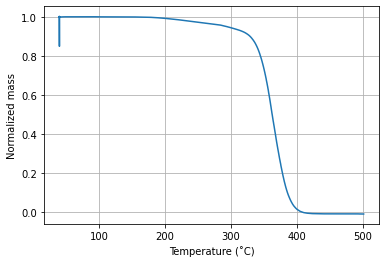

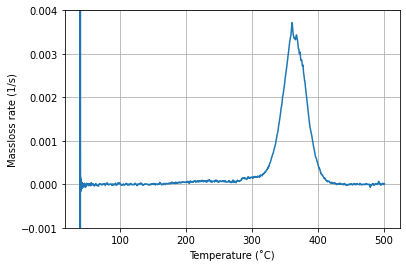

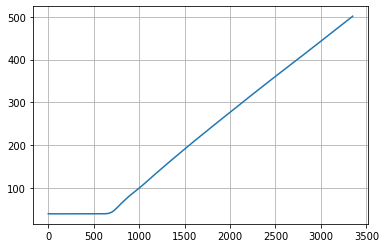

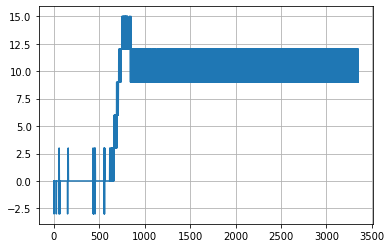

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
root = '../../../../'
TGA_Data = 'TGA_data_B43_10Kmin.csv'


TGA_data = pd.read_csv(TGA_Data, sep=',', names=['Time(s)', 'Temperature(C)', 'Mass(mg)'], skiprows=[0])

TGA_data['Normalized_mass'] = (TGA_data['Mass(mg)']+8.45)/8.45
TGA_data['massloss_rate'] = (-1)*np.gradient(TGA_data['Normalized_mass'], TGA_data['Time(s)'])
plt.figure()
plt.plot(TGA_data['Temperature(C)'], TGA_data['Normalized_mass'])
plt.ylabel('Normalized mass')
plt.xlabel('Temperature (˚C)')
plt.grid()
plt.plot()

plt.figure()
plt.plot(TGA_data['Temperature(C)'],TGA_data['massloss_rate'])
plt.ylabel('Massloss rate (1/s)')
plt.xlabel('Temperature (˚C)')
plt.ylim(-0.001, 0.004)
plt.grid()
plt.plot()

print('Maximum')
a = np.max(TGA_data['massloss_rate'][100:])
index = TGA_data.index
condition = TGA_data['massloss_rate'] == a
index = index[condition][0]
print(a)
print(TGA_data['Temperature(C)'][index])

plt.figure()
plt.plot(TGA_data['Time(s)'], TGA_data['Temperature(C)'])
plt.grid()

plt.figure()
plt.plot(TGA_data['Time(s)'], 60*np.gradient(TGA_data['Temperature(C)'], TGA_data['Time(s)']))
plt.grid()

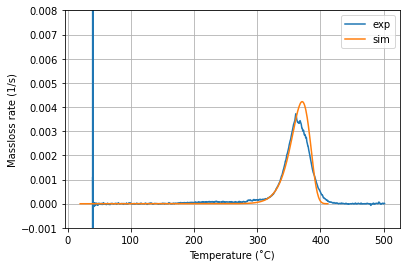

In [2]:
TGA_sim1 = root + 'data/pyrolysis/task1/rundir/pmma_example_tga.csv'
TGA_sim1 = pd.read_csv(TGA_sim1, sep=',', skiprows=[0])

plt.figure()
plt.plot(TGA_data['Temperature(C)'],TGA_data['massloss_rate'], label = 'exp')
plt.plot(TGA_sim1['Temp'],TGA_sim1['Total MLR'], label = 'sim')
plt.ylabel('Massloss rate (1/s)')
plt.xlabel('Temperature (˚C)')
plt.ylim(-0.001, 0.008)
plt.legend()
plt.grid()
plt.plot()
plt.show()

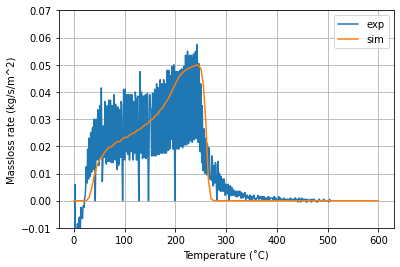

In [3]:
Gas_sim1 = root + 'data/pyrolysis/task1/rundir/pmma_example_devc.csv'
Aalto = 'Aalto_Gasification_65kW_1.csv'

Gas_sim1 = pd.read_csv(Gas_sim1, sep=',', skiprows=[0])
Aal = pd.read_csv(Aalto, sep=',', header =0, skiprows=[1])

maxi = np.max(Aal['Mass'])
Aal['Normalized mass'] = Aal['Mass']/maxi
plt.figure()
plt.plot(Aal['Time'],((-1)*np.gradient(Aal['Mass'], Aal['Time']))*0.1, label='exp')
plt.plot(Gas_sim1['Time'],Gas_sim1['MF'], label='sim')
plt.ylabel('Massloss rate (kg/s/m^2)')
plt.xlabel('Temperature (˚C)')
plt.ylim(-0.01,0.07)
plt.grid()
plt.plot()
plt.legend()
plt.show()